In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

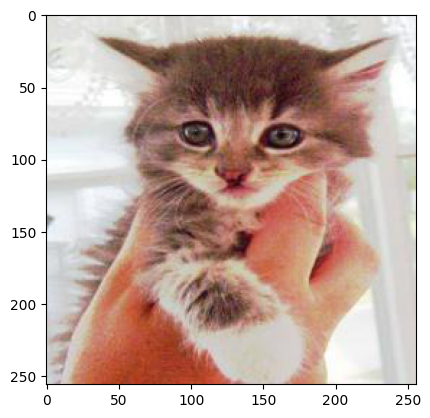

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
# display cat image
img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/cats_dogs/cats/Copy of cat.100 (1).jpg')
imgplt = plt.imshow(img)
plt.show()

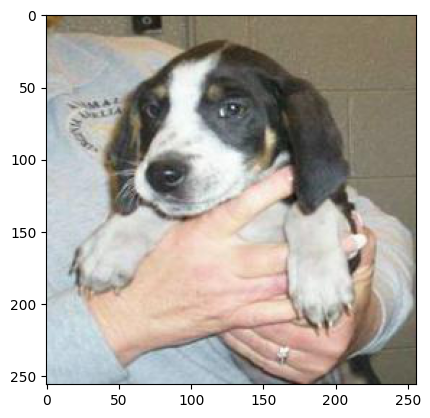

In [ ]:
# display dog image
img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/cats_dogs/dogs/dog.10.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
# Path to the main folder containing subfolders for cats and dogs
main_folder = "/content/drive/MyDrive/Colab Notebooks/cats_dogs"

# Load the VGG16 model
model = VGG16(weights="imagenet", include_top=False)

def extract_features(folder, num_samples):
    features = []
    labels = []

    file_list = os.listdir(folder)[:num_samples]

    for file in file_list:
        img_path = os.path.join(folder, file)
        img = Image.open(img_path)
        img = img.resize((256, 256))
        img = np.array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)

        feature = model.predict(img)
        features.append(feature.flatten())
        labels.append(folder.split('/')[-1])

    return features, labels

# Extract features for cats
cats_folder = os.path.join(main_folder, "cats")
cat_features, cat_labels = extract_features(cats_folder, 500)

# Extract features for dogs
dogs_folder = os.path.join(main_folder, "dogs")
dog_features, dog_labels = extract_features(dogs_folder, 500)

# Combine the features and labels into a single array
combined_data = np.column_stack((np.array(cat_features + dog_features), np.array(cat_labels + dog_labels)))




1/1 [==============================] - 0s 18ms/step


In [ ]:
import pandas as pd

# Create a pandas DataFrame from the combined_data array
df = pd.DataFrame(combined_data)

# Save the DataFrame to a CSV file
csv_file = "/content/drive/MyDrive/Colab Notebooks/features.csv"
ds=df.to_csv(csv_file, index=False)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,32759,32760,32761,32762,32763,32764,32765,32766,32767,32768
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.8684464,0.0,0.0,0.0,4.3258786,0.0,0.0,4.174345,2.4439642,cats
1,0.0,17.56109,1.9493403,5.1857295,0.0,5.0300345,0.0,0.0,4.9120994,0.0,...,0.0,0.0,0.0,0.0,0.0,12.276672,0.0,27.16182,0.0,cats
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1230539,0.0,0.0,...,0.0,0.0,0.0,0.0,9.315215,0.0,0.0,0.0,0.0,cats
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,39.61814,15.195379,0.0,6.7363625,0.0,25.68981,0.0,cats
4,0.0,0.0,0.0,0.0,1.1606945,0.0,2.1423864,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.9450331,2.61694,0.0,28.493355,0.0,cats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,26.351831,13.079042,0.0,0.0,0.0,0.0,0.0,0.0,dogs
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.681488,...,0.0,2.257068,0.0,0.0,0.0,0.0,0.0,0.0,7.636281,dogs
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.43446,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dogs
998,0.0,0.0,0.0,13.904766,0.0,17.907331,0.0,0.0,0.0,0.0,...,19.427885,0.0,0.0,0.91348886,0.0,0.0,10.999867,0.0,7.9954042,dogs


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the data from the CSV file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features.csv")

# Split the data into features (X) and labels (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM classifier
classifier = SVC()
classifier.fit(X_train, y_train)

# Evaluate the classifier on the testing data
accuracy = classifier.score(X_test, y_test)
print("Classifier Accuracy:", accuracy)


Classifier Accuracy: 0.9766666666666667


In [ ]:
# Calculate precision and recall
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
y_pred = classifier.predict(X_test)
precision = precision_score(y_test, y_pred, pos_label='cats')
recall = recall_score(y_test, y_pred, pos_label='cats')
print("Precision:", precision)
print("Recall:", recall)


Precision: 0.9673202614379085
Recall: 0.9866666666666667


In [ ]:
# Calculate F1 score

f1 = f1_score(y_test, y_pred, pos_label='cats')
print("F1 Score:", f1)



F1 Score: 0.9768976897689768


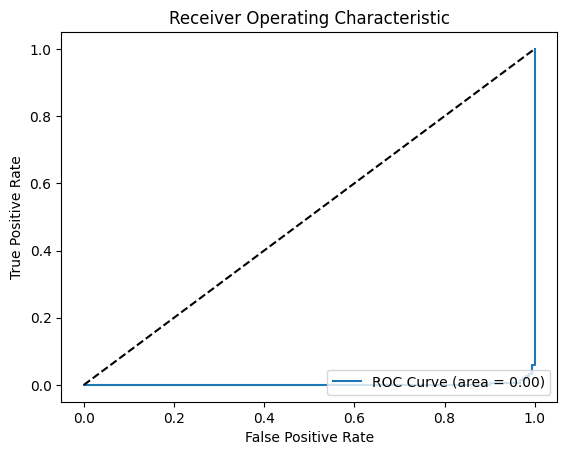

In [ ]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc
y_scores = classifier.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores, pos_label='cats')
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred, labels=['cats', 'dogs'])
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[148   2]
 [  5 145]]


In [ ]:
from sklearn.metrics import classification_report

# Train an SVM classifier
classifier = SVC()
classifier.fit(X_train, y_train)

# Evaluate the classifier on the testing data
y_pred = classifier.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

        cats       0.97      0.99      0.98       150
        dogs       0.99      0.97      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

